In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.max_rows', None)

In [4]:
df=pd.read_csv('../data/BOE_Limpio.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6154 entries, 0 to 6153
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   identificador         6154 non-null   object
 1   tipo_de_subasta       6154 non-null   object
 2   cuenta_expediente     6154 non-null   object
 3   fecha_de_inicio       6154 non-null   object
 4   fecha_de_conclusion   6154 non-null   object
 5   cantidad_reclamada    6154 non-null   int64 
 6   anuncio_BOE           6154 non-null   object
 7   valor_subasta         6154 non-null   int64 
 8   tasacion              6154 non-null   int64 
 9   puja_minima           6154 non-null   int64 
 10  tramos_entre_pujas    6154 non-null   int64 
 11  importe_del_deposito  6154 non-null   int64 
 12  direccion             6154 non-null   object
 13  codigo_postal         6154 non-null   int64 
 14  localidad             6154 non-null   object
 15  provincia             6154 non-null   

In [18]:
df.head()

,identificador,tipo_de_subasta,cuenta_expediente,fecha_de_inicio,fecha_de_conclusion,cantidad_reclamada,anuncio_BOE,valor_subasta,tasacion,puja_minima,tramos_entre_pujas,importe_del_deposito,direccion,codigo_postal,localidad,provincia,puja
0,SUB-JA-2022-204013,JUDICIAL EN VÍA DE APREMIO,4743 0000 05 1018 20,17-11-2022,08-12-2022,7145,BOE-B-2022-35270,108482,0,0,2169,5424,Urbanización Els Racons nº 5. partida Michafiga,46220,Picassent,Valencia/València,58580
1,SUB-JA-2022-196067,JUDICIAL EN VÍA DE APREMIO,2368 0000 06 0191 20,17-11-2022,08-12-2022,142298,BOE-B-2022-35269,305832,0,0,6116,15291,"CALLE GABRIEL GARCÍA MÁRQUEZ, 31",28980,PARLA,Madrid,177382
2,SUB-JA-2022-204060,JUDICIAL EN VÍA DE APREMIO,2995 0000 06 0456 16,17-11-2022,08-12-2022,55933,BOE-B-2022-35263,247902,0,0,0,12395,VIVIENDA 1 BLOQUE 19 CONJUNTO RESIDENCIAL HACI...,29600,Marbella,Málaga,252000
3,SUB-JA-2022-198972,JUDICIAL EN VÍA DE APREMIO,3997 0000 06 1661 20,27-09-2022,08-12-2022,210425,BOE-B-2022-28879,826272,0,0,16525,41313,"AVENIDA DE JACARANDA, 5, URBANIZACION CLUB DE ...",41930,BORMUJOS,Sevilla,512288
4,SUB-JA-2022-203383,JUDICIAL EN VÍA DE APREMIO,5418 0000 06 0169 21,17-11-2022,07-12-2022,34853,BOE-B-2022-35253,121684,121684,45978,2433,6084,"Calle Palma de Mallorca, nº 13, bloque 19, 3º ...",35016,Las Palmas de Gran Canaria,Las Palmas,45978


In [7]:
df['codigo_postal'] = df['codigo_postal'].astype(str)

In [8]:
df['codigo_postal'] = df['codigo_postal'].apply(lambda x: x.zfill(5))

In [64]:
df['codigo_postal'] = df['codigo_postal'].astype(int)

In [ ]:
df.to_csv('../data/BOE_Limpio.csv', index=False, sep=',') 

In [ ]:
#df.to_excel('../data/BOE_Limpio.xlsx', index=False)

In [10]:
cp=df.codigo_postal

In [11]:
cp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6154 entries, 0 to 6153
Series name: codigo_postal
Non-Null Count  Dtype 
--------------  ----- 
6154 non-null   object
dtypes: object(1)
memory usage: 48.2+ KB


In [12]:
lista=cp.tolist()

In [13]:
lista1=lista[:1539]
len(lista1)

1539

In [14]:
lista2=lista[1539:3077]
len(lista2)

1538

In [15]:
lista3=lista[3077:4616]
len(lista3)

1539

In [16]:
lista4=lista[4616:6154]
len(lista4)

1538

In [17]:
len(lista)

6154

In [25]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from joblib import Parallel, delayed 
from multiprocessing import get_context
import multiprocessing as mp
import time
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
PATH=ChromeDriverManager().install()
import warnings
warnings.filterwarnings('ignore')

In [20]:
mp.get_start_method()

'spawn'

In [21]:
pool=get_context('fork').Pool(mp.cpu_count()) 

In [22]:
mp.cpu_count()

8

In [23]:
pool=get_context('fork').Pool(8)

In [26]:
#driver configuration
opciones=Options()

opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)
opciones.headless=False    # si True, no aperece la ventana (headless=no visible)
opciones.add_argument('--start-maximized')         # comienza maximizado
#opciones.add_argument('user-data-dir=selenium')    # mantiene las cookies
#opciones.add_extension('driver_folder/adblock.crx')       # adblocker
opciones.add_argument('--incognito')
opciones.add_argument("--no-sandbox")
opciones.add_argument("--disable-dev-shm-usage")

In [27]:
from selenium.webdriver.common.keys import Keys

In [28]:
from selenium.webdriver.support.wait import WebDriverWait

In [29]:
from selenium.webdriver.support import expected_conditions as EC

In [30]:
type(lista)

list

In [33]:
from tqdm import tqdm

for f in lista:
    print (f)

In [34]:
#prueba=['31004','21000','46220']
#print (prueba)

In [39]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [35]:
from selenium.common.exceptions import NoSuchElementException

In [40]:
def cpostal(e):
    url='https://realadvisor.es/es/precios-viviendas'
    driver=webdriver.Chrome(PATH)
    driver.get(url)
    time.sleep(2)
    tmp=[]
    
    #texto=driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/div[1]/div[1]/div[1]/input')
    texto=WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[1]/div[2]/div/div[1]/div[1]/div[1]/input')))

   
    
    texto.click()
    texto.clear()
    
    #for e in prueba:
    texto.send_keys(e) # escribe texto

    time.sleep(2)

    texto.send_keys(Keys.ARROW_DOWN)

    texto.send_keys(Keys.ENTER)

    time.sleep(3)
    
    try:
        precio=driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div/div[2]/div/div[1]/div[2]/div[1]/div[2]/div/div[2]/div[1]')
    except NoSuchElementException:
        pass
    
    tmp.append(precio.text)
   # df2=pd.DataFrame(tmp)
    #df2.to_csv('../data/preciometrodef.csv', index=False, sep=',') 
    #return tmp

    driver.quit()
    return tmp
    

In [58]:
# Lo scrapeo por partes porque me esta dando problemas con chrome

In [41]:
lst1=Parallel(n_jobs=-1, verbose=True)(delayed(cpostal)(e) for e in tqdm(lista1))


  0%|                                                  | 0/1539 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service 

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  4%|█▍                                     | 56/1539 [06:35<3:21:30,  8.15s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

  9%|███▌                                  | 144/1539 [21:14<3:52:01,  9.98s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 12%|████▋                                 | 192/1539 [29:17<3:45:10, 10.03s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 16%|█████▉                                | 240/1539 [37:29<3:42:15, 10.27s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 21%|████████                              | 328/1539 [52:16<3:24:00, 10.11s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 24%|█████████▎                            | 376/1539 [59:55<3:09:03,  9.75s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 28%|█████████▉                          | 424/1539 [1:07:59<3:06:36, 10.04s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 33%|███████████▉                        | 512/1539 [1:22:29<2:48:31,  9.85s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 36%|█████████████                       | 560/1539 [1:30:31<2:43:14, 10.00s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 40%|██████████████▏                     | 608/1539 [1:38:34<2:35:44, 10.04s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 45%|████████████████▎                   | 696/1539 [1:53:13<2:19:51,  9.95s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 48%|█████████████████▍                  | 744/1539 [2:01:14<2:12:32, 10.00s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 51%|██████████████████▌                 | 792/1539 [2:09:17<2:05:33, 10.09s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 57%|████████████████████▌               | 880/1539 [2:24:06<1:50:24, 10.05s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 60%|█████████████████████▋              | 928/1539 [2:32:10<1:42:50, 10.10s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 66%|███████████████████████            | 1016/1539 [2:46:52<1:27:45, 10.07s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 69%|████████████████████████▏          | 1064/1539 [2:54:53<1:19:23, 10.03s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 72%|█████████████████████████▎         | 1112/1539 [3:02:58<1:11:59, 10.12s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 75%|██████████████████████████▍        | 1160/1539 [3:10:59<1:03:17, 10.02s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 81%|██████████████████████████████       | 1248/1539 [3:25:43<48:49, 10.07s/it][Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 205.8min
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/f

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 84%|███████████████████████████████▏     | 1296/1539 [3:33:37<39:44,  9.81s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 87%|████████████████████████████████▎    | 1344/1539 [3:41:38<32:25,  9.97s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 93%|██████████████████████████████████▍  | 1432/1539 [3:56:24<18:02, 10.12s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 96%|███████████████████████████████████▌ | 1480/1539 [4:04:28<09:55, 10.09s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 99%|████████████████████████████████████▋| 1528/1539 [4:11:22<01:39,  9.07s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

In [42]:
df1=pd.DataFrame(lst1)

In [43]:
df1.to_csv('../data/preciometro1.csv', index=False, sep=',') 

In [44]:
lst2=Parallel(n_jobs=-1, verbose=True)(delayed(cpostal)(e) for e in tqdm(lista2))


  0%|                                                  | 0/1538 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service 

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  4%|█▍                                     | 56/1538 [06:45<3:37:09,  8.79s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  7%|██▌                                   | 104/1538 [14:46<3:56:55,  9.91s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 12%|████▋                                 | 192/1538 [29:27<3:43:27,  9.96s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 16%|█████▉                                | 240/1538 [37:28<3:36:05,  9.99s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 19%|███████                               | 288/1538 [45:30<3:30:01, 10.08s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 24%|████████▊                           | 376/1538 [1:00:16<3:14:31, 10.04s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 28%|█████████▉                          | 424/1538 [1:08:19<3:06:15, 10.03s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 31%|███████████                         | 472/1538 [1:16:15<2:53:18,  9.75s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 36%|█████████████                       | 560/1538 [1:30:50<2:40:35,  9.85s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 40%|██████████████▏                     | 608/1538 [1:38:54<2:35:40, 10.04s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 43%|███████████████▎                    | 656/1538 [1:46:53<2:26:48,  9.99s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 46%|████████████████▍                   | 704/1538 [1:54:54<2:19:55, 10.07s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 51%|██████████████████▌                 | 792/1538 [2:09:35<2:04:14,  9.99s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 55%|███████████████████▋                | 840/1538 [2:17:36<1:56:40, 10.03s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 60%|█████████████████████▋              | 928/1538 [2:32:18<1:42:37, 10.09s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 63%|██████████████████████▊             | 976/1538 [2:40:21<1:34:15, 10.06s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 67%|███████████████████████▎           | 1024/1538 [2:48:23<1:26:17, 10.07s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 70%|████████████████████████▍          | 1072/1538 [2:56:18<1:17:13,  9.94s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 75%|██████████████████████████▍        | 1160/1538 [3:10:58<1:02:51,  9.98s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 79%|█████████████████████████████        | 1208/1538 [3:19:02<55:17, 10.05s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 82%|██████████████████████████████▏      | 1256/1538 [3:27:07<47:39, 10.14s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 87%|████████████████████████████████▎    | 1344/1538 [3:41:46<32:22, 10.01s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 91%|█████████████████████████████████▍   | 1392/1538 [3:49:46<24:23, 10.02s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 94%|██████████████████████████████████▋  | 1440/1538 [3:57:48<16:18,  9.99s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 99%|████████████████████████████████████▊| 1528/1538 [4:12:23<01:39,  9.97s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

In [45]:
df2=pd.DataFrame(lst2)

In [46]:
df2.to_csv('../data/preciometro2.csv', index=False, sep=',') 

In [47]:
lst3=Parallel(n_jobs=-1, verbose=True)(delayed(cpostal)(e) for e in tqdm(lista3))


  0%|                                                  | 0/1539 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service 

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  4%|█▍                                     | 56/1539 [07:56<3:52:58,  9.43s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  7%|██▌                                   | 104/1539 [15:47<3:52:39,  9.73s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 12%|████▋                                 | 192/1539 [30:31<3:45:51, 10.06s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 16%|█████▉                                | 240/1539 [38:32<3:38:10, 10.08s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 21%|████████                              | 328/1539 [53:14<3:22:26, 10.03s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 24%|████████▊                           | 376/1539 [1:01:20<3:15:32, 10.09s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 28%|█████████▉                          | 424/1539 [1:09:17<3:04:25,  9.92s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 33%|███████████▉                        | 512/1539 [1:23:55<2:49:54,  9.93s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 36%|█████████████                       | 560/1539 [1:31:57<2:45:01, 10.11s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 40%|██████████████▏                     | 608/1539 [1:40:00<2:35:25, 10.02s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 45%|████████████████▎                   | 696/1539 [1:54:44<2:20:46, 10.02s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 48%|█████████████████▍                  | 744/1539 [2:02:43<2:12:51, 10.03s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 51%|██████████████████▌                 | 792/1539 [2:10:39<2:03:44,  9.94s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 57%|████████████████████▌               | 880/1539 [2:25:20<1:50:05, 10.02s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 60%|█████████████████████▋              | 928/1539 [2:33:18<1:41:27,  9.96s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 66%|███████████████████████            | 1016/1539 [2:47:55<1:26:44,  9.95s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 69%|████████████████████████▏          | 1064/1539 [2:55:56<1:18:53,  9.97s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 72%|█████████████████████████▎         | 1112/1539 [3:03:58<1:11:30, 10.05s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 81%|██████████████████████████████       | 1248/1539 [3:26:40<48:38, 10.03s/it][Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 206.7min
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 84%|███████████████████████████████▏     | 1296/1539 [3:34:38<40:12,  9.93s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 87%|████████████████████████████████▎    | 1344/1539 [3:42:44<32:52, 10.12s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

 90%|█████████████████████████████████▎   | 1384/1539 [3:49:24<25:55, 10.04s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 93%|██████████████████████████████████▍  | 1432/1539 [3:57:27<18:00, 10.10s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 96%|███████████████████████████████████▌ | 1480/1539 [4:05:30<09:52, 10.04s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 99%|████████████████████████████████████▋| 1528/1539 [4:13:27<01:49,  9.94s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

In [48]:
df3=pd.DataFrame(lst3)

In [49]:
df3.to_csv('../data/preciometro3.csv', index=False, sep=',') 

In [50]:
lst4=Parallel(n_jobs=-1, verbose=True)(delayed(cpostal)(e) for e in tqdm(lista4))


  0%|                                                  | 0/1538 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service 

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  4%|█▍                                     | 56/1538 [07:56<3:52:53,  9.43s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  7%|██▌                                   | 104/1538 [15:56<3:57:01,  9.92s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 12%|████▋                                 | 192/1538 [30:38<3:45:31, 10.05s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 16%|█████▉                                | 240/1538 [38:42<3:38:59, 10.12s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 19%|███████                               | 288/1538 [46:38<3:26:28,  9.91s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 24%|████████▊                           | 376/1538 [1:01:26<3:14:41, 10.05s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 28%|█████████▉                          | 424/1538 [1:09:15<3:01:27,  9.77s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 33%|███████████▉                        | 512/1538 [1:21:54<2:34:41,  9.05s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 36%|█████████████                       | 560/1538 [1:30:04<2:43:39, 10.04s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 40%|██████████████▏                     | 608/1538 [1:38:07<2:35:13, 10.01s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 45%|████████████████▎                   | 696/1538 [1:52:51<2:20:53, 10.04s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 48%|█████████████████▍                  | 744/1538 [2:00:49<2:11:54,  9.97s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 51%|██████████████████▌                 | 792/1538 [2:08:47<2:04:08,  9.98s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass 


/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 57%|████████████████████▌               | 880/1538 [2:23:29<1:49:34,  9.99s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 60%|█████████████████████▋              | 928/1538 [2:31:28<1:41:17,  9.96s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 63%|██████████████████████▊             | 976/1538 [2:39:29<1:33:57, 10.03s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 67%|███████████████████████▎           | 1024/1538 [2:47:31<1:26:04, 10.05s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 72%|█████████████████████████▎         | 1112/1538 [3:02:08<1:10:42,  9.96s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 75%|██████████████████████████▍        | 1160/1538 [3:10:05<1:02:31,  9.93s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 79%|█████████████████████████████        | 1208/1538 [3:17:56<54:47,  9.96s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 84%|███████████████████████████████▏     | 1296/1538 [3:32:28<40:18, 10.00s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 87%|████████████████████████████████▎    | 1344/1538 [3:40:27<32:25, 10.03s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

 91%|█████████████████████████████████▍   | 1392/1538 [3:48:32<24:33, 10.09s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass

 96%|███████████████████████████████████▌ | 1480/1538 [4:03:17<09:42, 10.05s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/409022

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object

/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
 99%|████████████████████████████████████▊| 1528/1538 [4:11:17<01:39,  9.98s/it]/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/4090227401.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
/var/folders/jp/yhf41mgn0cdf11bv_9bsyftm0000gn/T/ipykernel_1108/40902

In [51]:
df4=pd.DataFrame(lst4)

In [52]:
df4.to_csv('../data/preciometro4.csv', index=False, sep=',') 

In [57]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1538 non-null   object
dtypes: object(1)
memory usage: 12.1+ KB


In [59]:
pdlist=[df1,df2,df3,df4]

In [60]:
pm2=pd.concat(pdlist)

In [70]:
pm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6154 entries, 0 to 1537
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pm2     6154 non-null   object
dtypes: object(1)
memory usage: 96.2+ KB


In [69]:
pm2.columns = ['pm2']

In [ ]:
#lo añado ahora al df del BOE

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6154 entries, 0 to 6153
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   identificador         6154 non-null   object
 1   tipo_de_subasta       6154 non-null   object
 2   cuenta_expediente     6154 non-null   object
 3   fecha_de_inicio       6154 non-null   object
 4   fecha_de_conclusion   6154 non-null   object
 5   cantidad_reclamada    6154 non-null   int64 
 6   anuncio_BOE           6154 non-null   object
 7   valor_subasta         6154 non-null   int64 
 8   tasacion              6154 non-null   int64 
 9   puja_minima           6154 non-null   int64 
 10  tramos_entre_pujas    6154 non-null   int64 
 11  importe_del_deposito  6154 non-null   int64 
 12  direccion             6154 non-null   object
 13  codigo_postal         6154 non-null   int64 
 14  localidad             6154 non-null   object
 15  provincia             6154 non-null   

In [73]:
df['pm2'] = pm2['pm2'].values

In [102]:
df.head()

,identificador,tipo_de_subasta,cuenta_expediente,fecha_de_inicio,fecha_de_conclusion,cantidad_reclamada,anuncio_BOE,valor_subasta,tasacion,puja_minima,tramos_entre_pujas,importe_del_deposito,direccion,codigo_postal,localidad,provincia,puja,pm2
0,SUB-JA-2022-204013,JUDICIAL EN VÍA DE APREMIO,4743 0000 05 1018 20,17-11-2022,08-12-2022,7145,BOE-B-2022-35270,108482,0,0,2169,5424,Urbanización Els Racons nº 5. partida Michafiga,46220,Picassent,Valencia/València,58580,1088
1,SUB-JA-2022-196067,JUDICIAL EN VÍA DE APREMIO,2368 0000 06 0191 20,17-11-2022,08-12-2022,142298,BOE-B-2022-35269,305832,0,0,6116,15291,"CALLE GABRIEL GARCÍA MÁRQUEZ, 31",28980,PARLA,Madrid,177382,1721
2,SUB-JA-2022-204060,JUDICIAL EN VÍA DE APREMIO,2995 0000 06 0456 16,17-11-2022,08-12-2022,55933,BOE-B-2022-35263,247902,0,0,0,12395,VIVIENDA 1 BLOQUE 19 CONJUNTO RESIDENCIAL HACI...,29600,Marbella,Málaga,252000,1721
3,SUB-JA-2022-198972,JUDICIAL EN VÍA DE APREMIO,3997 0000 06 1661 20,27-09-2022,08-12-2022,210425,BOE-B-2022-28879,826272,0,0,16525,41313,"AVENIDA DE JACARANDA, 5, URBANIZACION CLUB DE ...",41930,BORMUJOS,Sevilla,512288,1557
4,SUB-JA-2022-203383,JUDICIAL EN VÍA DE APREMIO,5418 0000 06 0169 21,17-11-2022,07-12-2022,34853,BOE-B-2022-35253,121684,121684,45978,2433,6084,"Calle Palma de Mallorca, nº 13, bloque 19, 3º ...",35016,Las Palmas de Gran Canaria,Las Palmas,45978,1130


In [76]:
#limpiamos el signo de euros
df['pm2'] =df['pm2'].replace('\u20AC','',regex=True)

In [86]:
df.pm2.unique()

array(['1088 ', '1721 ', '1557 ', ..., '3695 ', '1986 ', '320 '],
      dtype=object)

In [95]:
#print(df['pm2'].where(df['pm2'] == 'N / A'))

In [92]:
df.iloc[14],[-1]

(identificador                                     SUB-JA-2022-204132
 tipo_de_subasta                           JUDICIAL EN VÍA DE APREMIO
 cuenta_expediente                               2459 0000 00 0168 21
 fecha_de_inicio                                           17-11-2022
 fecha_de_conclusion                                       07-12-2022
 cantidad_reclamada                                             83205
 anuncio_BOE                                         BOE-B-2022-35261
 valor_subasta                                                 351319
 tasacion                                                           0
 puja_minima                                                      200
 tramos_entre_pujas                                              7026
 importe_del_deposito                                           17565
 direccion               Calle Santa Lucia, 3 - Piso: 1 - Puerta: EXT
 codigo_postal                                                  28004
 localidad          

In [ ]:
df2 = df[["pm2"]].mean()
print(df2)

In [96]:
#añadimos la media de los pm2
def limpiar(x):
    
    if 'N / A' in x:
        return '1200'
    else:
        return x

In [98]:
df["pm2"] = df["pm2"].apply(limpiar)

In [99]:
df['pm2'] = df['pm2'].astype(int)

In [10]:
df.to_csv('../data/BOE_def.csv', index=False, sep=',')

In [11]:
df.to_excel('../data/BOE_def.xlsx', index=False)

In [4]:
df=pd.read_csv('../data/BOE_def.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6154 entries, 0 to 6153
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   identificador         6154 non-null   object
 1   tipo_de_subasta       6154 non-null   object
 2   cuenta_expediente     6154 non-null   object
 3   fecha_de_inicio       6154 non-null   object
 4   fecha_de_conclusion   6154 non-null   object
 5   cantidad_reclamada    6154 non-null   int64 
 6   anuncio_BOE           6154 non-null   object
 7   valor_subasta         6154 non-null   int64 
 8   tasacion              6154 non-null   int64 
 9   puja_minima           6154 non-null   int64 
 10  tramos_entre_pujas    6154 non-null   int64 
 11  importe_del_deposito  6154 non-null   int64 
 12  direccion             6154 non-null   object
 13  codigo_postal         6154 non-null   int64 
 14  localidad             6154 non-null   object
 15  provincia             6154 non-null   

In [6]:
df.provincia.unique()

array(['Valencia/València', 'Madrid', 'Málaga', 'Sevilla', 'Las Palmas',
       'Barcelona', 'Huesca', 'Almería', 'Albacete',
       'Santa Cruz de Tenerife', 'Ciudad Real', 'Asturias', 'Huelva',
       'Illes Balears', 'Navarra', 'Jaén', 'Zaragoza', 'Cáceres',
       'Alicante/Alacant', 'Cádiz', 'Bizkaia', 'Valencia', 'Lugo', 'León',
       'A Coruña', 'Pontevedra', 'Girona', 'Valladolid', 'Gipuzkoa',
       'La Rioja', 'Lleida', 'Tarragona', 'Castellón/Castelló', 'Ourense',
       'Badajoz', 'Murcia', 'Zamora', 'Granada', 'Soria', 'Cantabria',
       'Toledo', 'Araba/Álava', 'Salamanca', 'Gerona', 'Castellón',
       'Córdoba', 'Guadalajara', 'Palencia', 'Lérida', 'Ceuta', 'Burgos',
       'Melilla', 'Alicante', 'Teruel', 'Baleares', 'Cuenca', 'Segovia',
       'Ávila', 'Vizcaya', 'Orense', 'Guipúzcoa', 'La Coruña', 'Álava'],
      dtype=object)

In [7]:
#creamos new colum con la diferencia entre la deuda(cantidad_reclamada) y el valor que le da el juez(valor_subasta)
df['difference'] = df['valor_subasta'].sub(df['cantidad_reclamada'], axis = 0)

In [8]:
df.head()

,identificador,tipo_de_subasta,cuenta_expediente,fecha_de_inicio,fecha_de_conclusion,cantidad_reclamada,anuncio_BOE,valor_subasta,tasacion,puja_minima,tramos_entre_pujas,importe_del_deposito,direccion,codigo_postal,localidad,provincia,puja,pm2,difference
0,SUB-JA-2022-204013,JUDICIAL EN VÍA DE APREMIO,4743 0000 05 1018 20,17-11-2022,08-12-2022,7145,BOE-B-2022-35270,108482,0,0,2169,5424,Urbanización Els Racons nº 5. partida Michafiga,46220,Picassent,Valencia/València,58580,1088,101337
1,SUB-JA-2022-196067,JUDICIAL EN VÍA DE APREMIO,2368 0000 06 0191 20,17-11-2022,08-12-2022,142298,BOE-B-2022-35269,305832,0,0,6116,15291,"CALLE GABRIEL GARCÍA MÁRQUEZ, 31",28980,PARLA,Madrid,177382,1721,163534
2,SUB-JA-2022-204060,JUDICIAL EN VÍA DE APREMIO,2995 0000 06 0456 16,17-11-2022,08-12-2022,55933,BOE-B-2022-35263,247902,0,0,0,12395,VIVIENDA 1 BLOQUE 19 CONJUNTO RESIDENCIAL HACI...,29600,Marbella,Málaga,252000,1721,191969
3,SUB-JA-2022-198972,JUDICIAL EN VÍA DE APREMIO,3997 0000 06 1661 20,27-09-2022,08-12-2022,210425,BOE-B-2022-28879,826272,0,0,16525,41313,"AVENIDA DE JACARANDA, 5, URBANIZACION CLUB DE ...",41930,BORMUJOS,Sevilla,512288,1557,615847
4,SUB-JA-2022-203383,JUDICIAL EN VÍA DE APREMIO,5418 0000 06 0169 21,17-11-2022,07-12-2022,34853,BOE-B-2022-35253,121684,121684,45978,2433,6084,"Calle Palma de Mallorca, nº 13, bloque 19, 3º ...",35016,Las Palmas de Gran Canaria,Las Palmas,45978,1130,86831


In [5]:
df=pd.read_csv('../data/BOE_def.csv')

In [6]:
df.head()

,identificador,tipo_de_subasta,cuenta_expediente,fecha_de_inicio,fecha_de_conclusion,cantidad_reclamada,anuncio_BOE,valor_subasta,tasacion,puja_minima,tramos_entre_pujas,importe_del_deposito,direccion,codigo_postal,localidad,provincia,puja,pm2,difference
0,SUB-JA-2022-204013,JUDICIAL EN VÍA DE APREMIO,4743 0000 05 1018 20,17-11-2022,08-12-2022,7145,BOE-B-2022-35270,108482,0,0,2169,5424,Urbanización Els Racons nº 5. partida Michafiga,46220,Picassent,Valencia/València,58580,1088,101337
1,SUB-JA-2022-196067,JUDICIAL EN VÍA DE APREMIO,2368 0000 06 0191 20,17-11-2022,08-12-2022,142298,BOE-B-2022-35269,305832,0,0,6116,15291,"CALLE GABRIEL GARCÍA MÁRQUEZ, 31",28980,PARLA,Madrid,177382,1721,163534
2,SUB-JA-2022-204060,JUDICIAL EN VÍA DE APREMIO,2995 0000 06 0456 16,17-11-2022,08-12-2022,55933,BOE-B-2022-35263,247902,0,0,0,12395,VIVIENDA 1 BLOQUE 19 CONJUNTO RESIDENCIAL HACI...,29600,Marbella,Málaga,252000,1721,191969
3,SUB-JA-2022-198972,JUDICIAL EN VÍA DE APREMIO,3997 0000 06 1661 20,27-09-2022,08-12-2022,210425,BOE-B-2022-28879,826272,0,0,16525,41313,"AVENIDA DE JACARANDA, 5, URBANIZACION CLUB DE ...",41930,BORMUJOS,Sevilla,512288,1557,615847
4,SUB-JA-2022-203383,JUDICIAL EN VÍA DE APREMIO,5418 0000 06 0169 21,17-11-2022,07-12-2022,34853,BOE-B-2022-35253,121684,121684,45978,2433,6084,"Calle Palma de Mallorca, nº 13, bloque 19, 3º ...",35016,Las Palmas de Gran Canaria,Las Palmas,45978,1130,86831


In [7]:
import pylab as plt
import numpy as np
import seaborn as sns

In [11]:
df.drop(columns=['identificador','tipo_de_subasta','cuenta_expediente',
                  'anuncio_BOE','tasacion','puja_minima','tramos_entre_pujas',
                 'importe_del_deposito','direccion','localidad'], inplace=True)

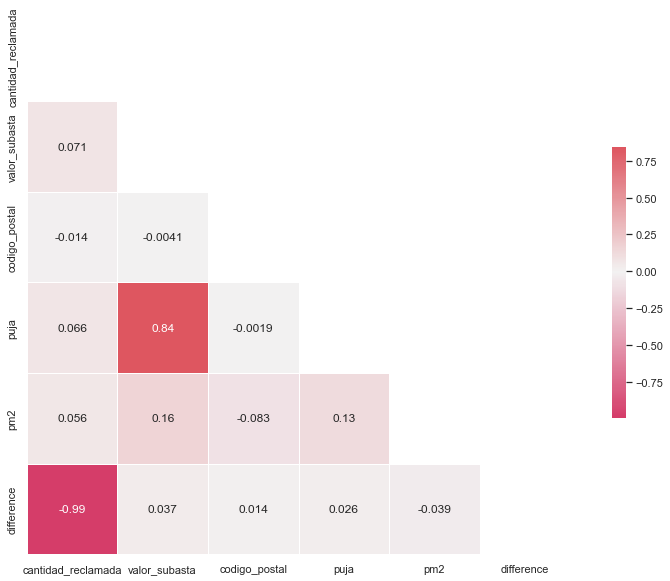

In [13]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
            
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

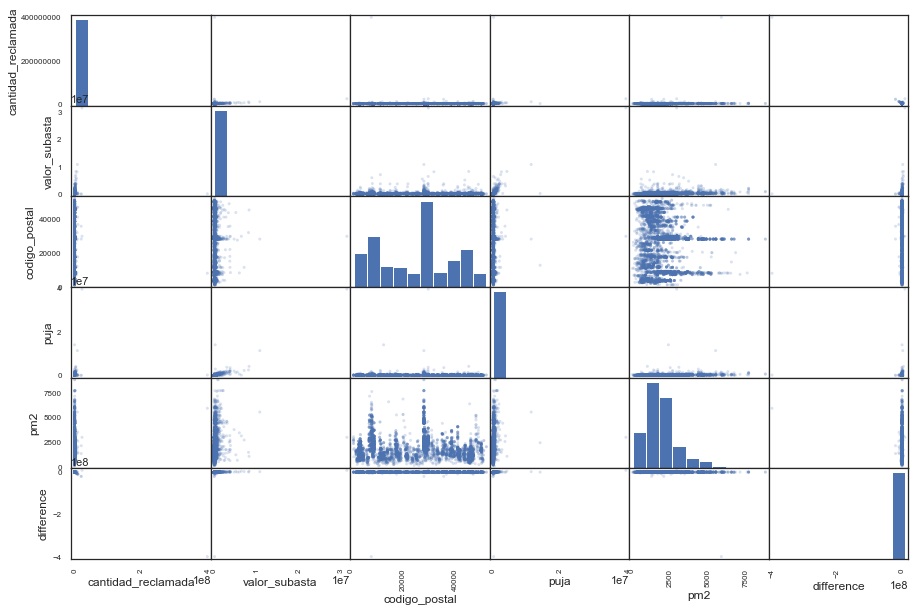

In [12]:
pd.plotting.scatter_matrix(df, figsize=(15, 10), alpha=0.2);